In [5]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
import os

In [1]:
pwd

'/Users/rs-mac-mini/work/fastai-test'

In [2]:
BASE_DIR = "/Users/rs-mac-mini/work/fastai-test"
DATA_DIR = f"{BASE_DIR}/compostnet-dataset-resized"

In [3]:
TRAIN_DIR = f"{DATA_DIR}/train"
VALIDATION_DIR = f"{DATA_DIR}/validation"
TEST_DIR = f"{DATA_DIR}/test"

In [5]:
classes_dir = [
    "cardboard",
    "glass",
    "paper",
    "trash",
    "compost",
    "metal",
    "plastic"
]

def split_data():
    test_ratio = 0.20
    val_ratio = 0.25

    for cls in classes_dir:
        os.makedirs(f"{TRAIN_DIR}/{cls}")
        os.makedirs(f"{VALIDATION_DIR}/{cls}")
        os.makedirs(f"{TEST_DIR}/{cls}")


        all_files = os.listdir(f"{DATA_DIR}/{cls}")
        np.random.shuffle(all_files)
        training_files, test_files = np.split(
            np.array(all_files),
                                        [int(len(all_files)* (1 - test_ratio))])

        training_files, validation_files = np.split(training_files, [int(len(training_files)* (1 - val_ratio))])
        training_files = [f"{cls}/{name}" for name in training_files.tolist()]
        validation_files = [f"{cls}/{name}" for name in validation_files.tolist()]
        test_files = [f"{cls}/{name}" for name in test_files.tolist()]


        for name in training_files:
            shutil.copy(f"{DATA_DIR}/{name}", f"{TRAIN_DIR}/{name}")

        for name in validation_files:
            shutil.copy(f"{DATA_DIR}/{name}", f"{VALIDATION_DIR}/{name}")

        for name in test_files:
            shutil.copy(f"{DATA_DIR}/{name}", f"{TEST_DIR}/{name}")

split_data()

In [8]:
tfms = get_transforms(do_flip=True, flip_vert=True)
data = ImageDataBunch.from_folder(DATA_DIR, test="test", valid="validation", ds_tfms=tfms, bs=16)

/Users/rs-mac-mini/.local/share/virtualenvs/fastai-test-JqTQbM7S/lib/python3.9/site-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


In [6]:
data

ImageDataBunch;

Train: LabelList (1646 items)
x: ImageList
Image (3, 300, 400),Image (3, 300, 400),Image (3, 300, 400),Image (3, 300, 400),Image (3, 300, 400)
y: CategoryList
paper,paper,paper,paper,paper
Path: /Users/rs-mac-mini/work/fastai-test/compostnet-dataset-resized;

Valid: LabelList (551 items)
x: ImageList
Image (3, 300, 400),Image (3, 300, 400),Image (3, 300, 400),Image (3, 300, 400),Image (3, 300, 400)
y: CategoryList
paper,paper,paper,paper,paper
Path: /Users/rs-mac-mini/work/fastai-test/compostnet-dataset-resized;

Test: LabelList (554 items)
x: ImageList
Image (3, 300, 400),Image (3, 300, 400),Image (3, 300, 400),Image (3, 300, 400),Image (3, 300, 400)
y: EmptyLabelList
,,,,
Path: /Users/rs-mac-mini/work/fastai-test/compostnet-dataset-resized

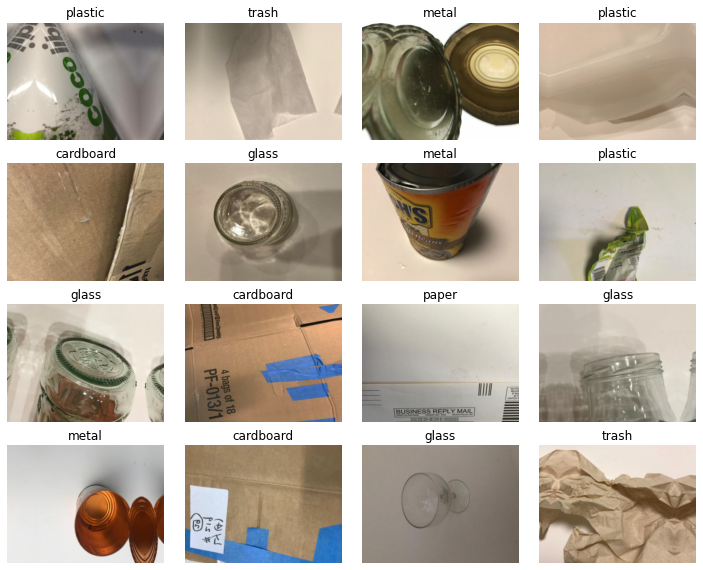

In [7]:
data.show_batch(rows=4,figsize=(10,8))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [6]:
learn.fit_one_cycle(20, max_lr=5.13e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.595571,0.772451,0.268603,14:07
1,1.041005,0.576544,0.188748,13:58
2,0.847569,0.505507,0.157895,14:25
3,0.921808,0.617696,0.194192,13:52
4,0.831912,0.807688,0.246824,13:49
5,0.876465,0.549750,0.170599,14:08
6,0.863596,0.634668,0.188748,14:14
7,0.737273,0.641396,0.201452,14:21
8,0.646486,0.473836,0.156080,14:43
9,0.580291,0.520723,0.161525,13:51


/Users/rs-mac-mini/.local/share/virtualenvs/fastai-test-JqTQbM7S/lib/python3.9/site-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]
/Users/rs-mac-mini/.local/share/virtualenvs/fastai-test-JqTQbM7S/lib/python3.9/site-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu,

In [8]:
learn.save(f'{BASE_DIR}/prueba')

In [12]:
learn = learn.load(f'{BASE_DIR}/prueba')

In [13]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [14]:
print(preds[0].shape)
preds[0]

torch.Size([554, 7])


tensor([[1.2730e-04, 3.4483e-05, 1.1497e-05,  ..., 9.9743e-01, 8.2023e-05,
         2.2782e-03],
        [1.3248e-04, 2.3933e-02, 5.5341e-04,  ..., 5.0774e-01, 2.8585e-02,
         4.3758e-01],
        [5.5982e-03, 1.2760e-03, 3.1893e-06,  ..., 9.9220e-01, 9.5826e-05,
         7.1909e-04],
        ...,
        [4.2490e-05, 9.9899e-01, 1.0673e-05,  ..., 1.6854e-04, 1.8310e-04,
         5.6315e-04],
        [3.0512e-07, 9.9975e-01, 8.2965e-08,  ..., 6.1194e-05, 1.2863e-06,
         1.8230e-04],
        [2.2908e-03, 9.8653e-01, 9.5033e-05,  ..., 7.0910e-03, 2.3860e-04,
         3.7242e-03]])

In [16]:
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

In [17]:
yhat

['paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'metal',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'trash',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'trash',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'trash',
 'trash',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',


In [18]:
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [19]:
cm = confusion_matrix(y,yhat)
print(cm)

[[ 80   0   0   0   1   0   0]
 [  0  34   0   2   0   0   0]
 [  0   0  97   3   0   1   0]
 [  0   0   1  79   0   0   3]
 [  0   0   0   1 114   0   4]
 [  0   0   7   2   2  83   3]
 [  0   3   0   2   4   1  27]]


In [27]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [28]:
accuracy = correct/sum(sum(cm))
accuracy

0.927797833935018

In [46]:
interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Test)

In [47]:
interp

In [49]:
interp.__dict__.keys()

dict_keys(['data', 'preds', 'y_true', 'losses', 'ds_type', 'learn', 'ds', 'pred_class'])

In [50]:
img = open_image(f"{BASE_DIR}/zanama.jpeg")

In [51]:
pred_class, pred_idx, outputs = learn.predict(img)

In [59]:
pred_idx

tensor(5)

In [53]:
outputs

tensor([1.2568e-02, 3.3892e-02, 5.8910e-04, 2.5859e-01, 5.1100e-02, 6.4115e-01,
        2.1112e-03])

In [54]:
learn.__dict__.keys()

dict_keys(['data', 'model', 'opt_func', 'loss_func', 'metrics', 'true_wd', 'bn_wd', 'wd', 'train_bn', 'path', 'model_dir', 'callback_fns', 'callbacks', 'layer_groups', 'add_time', 'silent', 'opt', 'recorder'])

In [58]:
data.classes

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']